# TRANSFORMER TRAINING

In [1]:
import sys
sys.path.insert(0, '..')  
import pandas as pd
import numpy as np
import random
from dataset import label_detection_training, label_detection_validation, label_detection_full
from models import Lstm, Gru, Transformer

In [4]:
columns = ['num_heads', 'dropout_rate','learning_rate', 'epoch', 'batch', 'num_layers', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max']
results = pd.DataFrame(columns=columns)

# Define hyperparameters to search over
hyperparameters = {
    'num_heads': [2, 3, 4, 5],
    "num_layers": [1, 2, 3, 4],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'epoch': [10, 15, 20, 25],
    'batch_size': [16, 32, 64, 128],
    'learning_rate': [0.0001, 0.001, 0.01]
}

#number of trials
n_iter = 10
for n in range(n_iter):
    # Randomly sample hyperparameters
    trans_params = {param: random.choice(values) for param, values in hyperparameters.items()}
    print(trans_params)

    # Create an instance of the Gru class with the randomly sampled hyperparameters
    trans = Transformer(**trans_params, num_classes=11)

    # Train the model on your training dataset
    trans.train(label_detection_training, label_detection_validation)
    results = np.concatenate((results, pd.DataFrame([[trans_params['num_heads'], trans_params['dropout_rate'], trans_params['learning_rate'], trans_params['epoch'], trans_params['batch_size'], trans_params['num_layers'], trans.history.history['loss'][-1], trans.history.history['loss'], trans.history.history['accuracy'][-1], trans.history.history['accuracy'], trans.history.history['val_loss'][-1], trans.history.history['val_loss'], trans.history.history['val_accuracy'][-1], trans.history.history['val_accuracy']]], 
                                                                        columns=columns)), axis=0)

    



{'num_heads': 4, 'num_layers': 3, 'dropout_rate': 0.4, 'epoch': 25, 'batch_size': 128, 'learning_rate': 0.01}
Epoch 1/25
453/453 [==============================] - ETA: 0s - loss: 1.5962 - accuracy: 0.6180
Epoch 1: val_accuracy improved from -inf to 0.62092, saving model to models\transformer.h5
453/453 [==============================] - 380s 782ms/step - loss: 1.5962 - accuracy: 0.6180 - val_loss: 2.5542 - val_accuracy: 0.6209
Epoch 2/25
453/453 [==============================] - ETA: 0s - loss: 1.5064 - accuracy: 0.6356
Epoch 2: val_accuracy did not improve from 0.62092
453/453 [==============================] - 387s 850ms/step - loss: 1.5064 - accuracy: 0.6356 - val_loss: 2.7165 - val_accuracy: 0.0362
Epoch 3/25
453/453 [==============================] - ETA: 0s - loss: 1.5017 - accuracy: 0.6356
Epoch 3: val_accuracy did not improve from 0.62092
453/453 [==============================] - 386s 849ms/step - loss: 1.5017 - accuracy: 0.6356 - val_loss: 2.2134 - val_accuracy: 0.6209
Epoc

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 13 and the array at index 1 has size 14

In [ ]:
results = pd.DataFrame(results)
results

# Best GRU result

In [1]:
import matplotlib.pyplot as plt

In [6]:
print(trans.history.history['loss'])
print(trans.history.history['val_loss'])
print(trans.history.history['accuracy'])
print(trans.history.history['val_accuracy'])

[1.1160730123519897, 0.6660863757133484, 0.555563747882843, 0.49678608775138855, 0.44850394129753113, 0.41253533959388733, 0.38366058468818665, 0.36045175790786743, 0.3405363857746124, 0.3276956379413605]
[0.6961086988449097, 0.5882535576820374, 0.5462737083435059, 0.45062294602394104, 0.432292103767395, 0.4684085249900818, 0.40765848755836487, 0.39137306809425354, 0.3966062664985657, 0.40114566683769226]
[0.666471004486084, 0.793121874332428, 0.8299812078475952, 0.8482468128204346, 0.8652694225311279, 0.8771472573280334, 0.8845536112785339, 0.8917873501777649, 0.8967077136039734, 0.901645302772522]
[0.7846425175666809, 0.8233304023742676, 0.8330391049385071, 0.8679023385047913, 0.8712856769561768, 0.8553986549377441, 0.8767284750938416, 0.8820241093635559, 0.8783465623855591, 0.8837893605232239]


## Loss

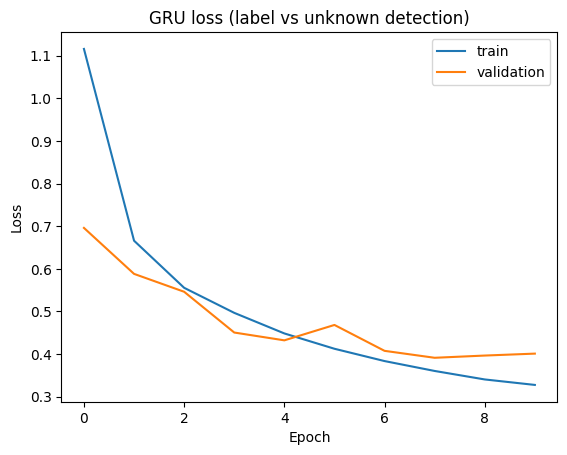

In [9]:
plt.plot(trans.history.history['loss'], label='train')
plt.plot(trans.history.history['val_loss'], label='validation')
plt.legend()
plt.title('GRU loss (label vs unknown detection)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Accuracy

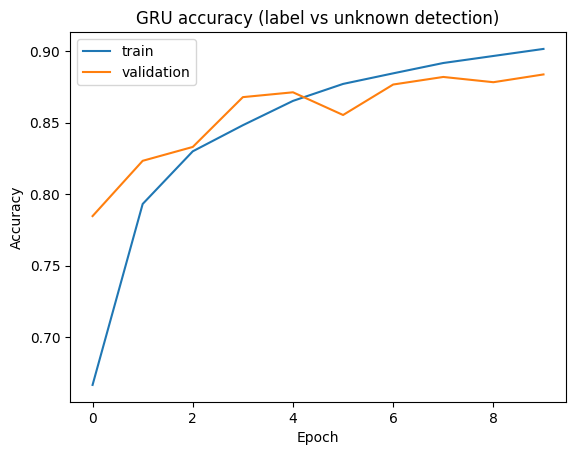

In [10]:
plt.plot(trans.history.history['accuracy'], label='train')
plt.plot(trans.history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('GRU accuracy (label vs unknown detection)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()